1. Data Collection 

Extracting two categories from Wikipedia: mathematics and musicians

(drop some files or add check with dbpedia)

In [149]:
import wikipedia
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
import spacy
from nltk.stem.porter import PorterStemmer
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter

In [150]:
# get names from list of pages

def get_names(pages):
    names = []

    for list in pages:
        links = wikipedia.page(list, auto_suggest=False).links
        names.extend(links)

    return names

In [114]:
BASE_URL = f"https://en.wikipedia.org/wiki/"
# get biography by name from Wikipedia
def get_biography(name):
    #formatted_name = name.replace(" ", "_")
    try:
        page = wikipedia.page(name).content
        return page
    except:
        return ""

In [115]:
# get biographies for list of names, together with its category and name
def get_biographies_with_category(names, category):
    biographies_with_category = []
    for name in names:
        biography = []
        biography.append(get_biography(name))
        biography.append(name)
        biography.append(category)
        biographies_with_category.append(biography)

    return biographies_with_category

In [151]:
# define categories and corresponding lists of pages on Wikipedia
categories = ['mathematician', 'musician']
lists_of_mathematics = ['List of American mathematicians'] # add more
lists_of_musicians = ['List of Native American musicians'] # add

# get names of people for each category
names_mathematics = get_names(lists_of_mathematics)
names_musicians = get_names(lists_of_musicians)
names_mathematics

['Alex Eskin',
 'Alfred Leon Foster',
 'Alonzo Church',
 'Alston Scott Householder',
 'American Mathematical Society',
 'Americans',
 'Amie Wilkinson',
 'Andrew M. Gleason',
 'Ann S. Almgren',
 'Archie Blake (mathematician)',
 'Association for Women in Mathematics',
 'Augustin Banyaga',
 'Barry Mazur',
 'Benjamin Banneker',
 'Benjamin Peirce',
 'Benson Farb',
 'Beverly Anderson',
 'Charles Coffin Sims',
 'Charles Fefferman',
 'Charles Reason',
 'Christina Eubanks-Turner',
 'Clarence F. Stephens',
 'Clark College (Washington)',
 'Claude Shannon',
 'Clifford Truesdell',
 'Clifford Victor Johnson',
 'Cornell University',
 'Curtis T. McMullen',
 'Dana Scott',
 'Daniel Gorenstein',
 'Daniel Quillen',
 'David Blackwell',
 'David Mumford',
 'Don Coppersmith',
 'Dorothy Vaughan',
 'Dudley Weldon Woodard',
 'E. H. Moore',
 'Edwin Spanier',
 'Einar Hille',
 'Elbert Frank Cox',
 'Elias M. Stein',
 'Elliott Mendelson',
 'Erica Flapan',
 'Etta Zuber Falconer',
 'Euphemia Haynes',
 'Evelyn Boyd Gran

In [117]:
# get all biographies together for all categories (returns the two sets of texts together with their classes)
def all_biographies(categories, names_per_category):
    biographies = []
    for i in range(len(categories)):
        biographies.append(get_biographies_with_category(names_per_category[i], categories[i]))
    return biographies

In [152]:
data = all_biographies(categories, [names_mathematics, names_musicians])
print(data)

c:\Users\liza2\.conda\envs\datascience\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\liza2\.conda\envs\datascience\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


[[['Alex Eskin (born May 19, 1965) is an American mathematician. He is the Arthur Holly Compton Distinguished Service Professor in the Department of Mathematics at the University of Chicago. His research focuses on rational billiards and geometric group theory.\n\n\n== Biography ==\nEskin was born in Kyiv on May 19, 1965. He is the son of a Russian-Jewish mathematician Gregory I. Eskin (b. 1936, Kiev), a professor at the University of California, Los Angeles. The family emigrated to Israel in 1974 and in 1982 to the United States.Eskin earned his doctorate from Princeton University in 1993, under the supervision of Peter Sarnak.Eskin has been a professor at the University of Chicago since 1999.\n\n\n== Awards ==\nEskin gave invited talks at the International Congress of Mathematicians in Berlin in 1998, and in Hyderabad in 2010.For his contribution to joint work with David Fisher and Kevin Whyte establishing the quasi-isometric rigidity of solvable groups, Eskin was awarded the 2007 Cl

In [153]:
# store data in pandas DataFrame
def data_to_dataframe(data):
    data_frame = pd.DataFrame(data=data[0] + data[1], columns=['text', 'name', 'category'])
    return data_frame

In [178]:
data_frame = data_to_dataframe(data)
data_frame.head()

text  \
0  Alex Eskin (born May 19, 1965) is an American ...   
1  Alfred Leon Foster (1904-1994) was an American...   
2                                                      
3  Alston Scott Householder (5 May 1904 – 4 July ...   
4  The American Mathematical Society (AMS) is an ...   

                            name       category  
0                     Alex Eskin  mathematician  
1             Alfred Leon Foster  mathematician  
2                  Alonzo Church  mathematician  
3       Alston Scott Householder  mathematician  
4  American Mathematical Society  mathematician

In [155]:
# store data into files .txt

def store_data_into_files(data):
    for text,name,category in data:
        with open(f"texts\{name}_{category}.txt", "w") as file:
            file.write(text)



In [122]:
store_data_into_files(data[0] + data[1])

2. Data Analysis

Preprocessing 

In [156]:
# tokenization is usefull - clasiffication will be based on tokens in text, token - base text unit

def tokenization(text):
    return nltk.word_tokenize(text)

In [158]:
data_frame_tokenized['text'] = data_frame['text'].apply(tokenization)
data_frame_tokenized.head()

text  \
0  [Alex, Eskin, (, born, May, 19, ,, 1965, ), is...   
1  [Alfred, Leon, Foster, (, 1904-1994, ), was, a...   
2                                                 []   
3  [Alston, Scott, Householder, (, 5, May, 1904, ...   
4  [The, American, Mathematical, Society, (, AMS,...   

                            name       category  
0                     Alex Eskin  mathematician  
1             Alfred Leon Foster  mathematician  
2                  Alonzo Church  mathematician  
3       Alston Scott Householder  mathematician  
4  American Mathematical Society  mathematician

In [160]:
# remove punctuation usefull - drop unnecessery tokens
# + lowercasing usefull
table = str.maketrans('', '', string.punctuation)
'.'.translate(table)

''

In [161]:
def removePunctuations(tokens: list):
    tokens_lower = []
    for token in tokens:
        tokens_lower.append(token.lower().translate(table))
    for token in tokens_lower:
        if len(token) == 0:
            tokens_lower.remove(token)
    return tokens_lower

In [162]:
data_frame_tokenized['text'] = data_frame_tokenized['text'].apply(removePunctuations)
data_frame_tokenized.head()

text  \
0  [alex, eskin, born, may, 19, 1965, is, an, ame...   
1  [alfred, leon, foster, 19041994, was, an, amer...   
2                                                 []   
3  [alston, scott, householder, 5, may, 1904, –, ...   
4  [the, american, mathematical, society, ams, is...   

                            name       category  
0                     Alex Eskin  mathematician  
1             Alfred Leon Foster  mathematician  
2                  Alonzo Church  mathematician  
3       Alston Scott Householder  mathematician  
4  American Mathematical Society  mathematician

In [163]:
# remove stop words usefull - not important in classification
def removeStopWords(tokens: list):
    stopWords = stopwords.words('english')
    tokens_withoutStopWords = []
    for token in tokens:
        if token not in stopWords:
            tokens_withoutStopWords.append(token)
    return tokens_withoutStopWords

In [164]:
data_frame_tokenized['text'] = data_frame_tokenized['text'].apply(removeStopWords)
data_frame_tokenized.head()

text  \
0  [alex, eskin, born, may, 19, 1965, american, m...   
1  [alfred, leon, foster, 19041994, american, mat...   
2                                                 []   
3  [alston, scott, householder, 5, may, 1904, –, ...   
4  [american, mathematical, society, ams, associa...   

                            name       category  
0                     Alex Eskin  mathematician  
1             Alfred Leon Foster  mathematician  
2                  Alonzo Church  mathematician  
3       Alston Scott Householder  mathematician  
4  American Mathematical Society  mathematician

In [165]:
# Lemmatizing and Stemming usefull - more important sense of word than its form
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

In [166]:
def lemmatizing(tokens):
    lemmatized_tokens = []
    for token in tokens:
        lemmatized_tokens.append(lemmatizer.lemmatize(token))
    return tokens 

In [167]:
data_frame_tokenized['text'] = data_frame_tokenized['text'].apply(lemmatizing)
data_frame_tokenized.head(n=20)

text  \
0   [alex, eskin, born, may, 19, 1965, american, m...   
1   [alfred, leon, foster, 19041994, american, mat...   
2                                                  []   
3   [alston, scott, householder, 5, may, 1904, –, ...   
4   [american, mathematical, society, ams, associa...   
5   [americans, citizens, nationals, united, state...   
6   [amie, wilkinson, born, 1968, american, mathem...   
7   [andrew, mattei, gleason, 1921–2008, american,...   
8   [ann, almgren, american, applied, mathematicia...   
9   [archie, blake, born, 1906, american, mathemat...   
10  [association, women, mathematics, awm, profess...   
11  [augustin, banyaga, born, march, 31, 1947, rwa...   
12  [barry, charles, mazur, born, december, 19, 19...   
13  [benjamin, banneker, november, 9, 1731, –, oct...   
14  [benjamin, peirce, april, 4, 1809, –, october,...   
15  [benson, stanley, farb, born, october, 25, 196...   
16  [beverly, jacques, anderson, born, september, ...   
17  [charles, coffin, sims, april, 14, 1937, –, oc...   
18  [charles, louis, fefferman, born, april, 18, 1...   
19  [charles, lewis, reason, july, 21, 1818, –, au...   

                                    name       category  
0                             Alex Eskin  mathematician  
1                     Alfred Leon Foster  mathematician  
2                          Alonzo Church  mathematician  
3               Alston Scott Householder  mathematician  
4          American Mathematical Society  mathematician  
5                              Americans  mathematician  
6                         Amie Wilkinson  mathematician  
7                      Andrew M. Gleason  mathematician  
8                         Ann S. Almgren  mathematician  
9           Archie Blake (mathematician)  mathematician  
10  Association for Women in Mathematics  mathematician  
11                      Augustin Banyaga  mathematician  
12                           Barry Mazur  mathematician  
13                     Benjamin Banneker  mathematician  
14                       Benjamin Peirce  mathematician  
15                           Benson Farb  mathematician  
16                      Beverly Anderson  mathematician  
17                   Charles Coffin Sims  mathematician  
18                     Charles Fefferman  mathematician  
19                        Charles Reason  mathematician

In [168]:
porter = PorterStemmer()

In [169]:
def stemming(tokens):
    stemmed_tokens = []
    for token in tokens:
        stemmed_tokens.append(porter.stem(token))
    return tokens 

In [170]:
data_frame_tokenized['text'] = data_frame_tokenized['text'].apply(stemming)
data_frame_tokenized.head()

text  \
0  [alex, eskin, born, may, 19, 1965, american, m...   
1  [alfred, leon, foster, 19041994, american, mat...   
2                                                 []   
3  [alston, scott, householder, 5, may, 1904, –, ...   
4  [american, mathematical, society, ams, associa...   

                            name       category  
0                     Alex Eskin  mathematician  
1             Alfred Leon Foster  mathematician  
2                  Alonzo Church  mathematician  
3       Alston Scott Householder  mathematician  
4  American Mathematical Society  mathematician

 - Vocabulary: 50 most frequent words and word cloud for each
category


In [171]:
# all tokens per category
tokens_mathematician = []
for tokens in data_frame_tokenized[data_frame_tokenized["category"] == "mathematician"]['text']:
    tokens_mathematician.extend(tokens)

tokens_musician = []
for tokens in data_frame_tokenized[data_frame_tokenized["category"] == "musician"]['text']:
    tokens_musician.extend(tokens)

In [172]:
# 50 most frequent words for category mathematician
word_counts_mathematician = Counter(tokens_mathematician)
most_common_words_mathematician = word_counts_mathematician.most_common(50)

for word, count in most_common_words_mathematician:
    print(f'{word}: {count}')

: 4577
university: 1225
mathematics: 992
american: 681
mathematical: 622
theory: 544
first: 542
also: 511
new: 496
college: 432
research: 426
society: 426
war: 412
penn: 397
school: 361
one: 346
work: 340
national: 322
science: 296
states: 292
students: 287
united: 281
john: 268
sciences: 265
professor: 257
princeton: 256
two: 242
became: 241
1: 232
york: 228
years: 227
world: 225
number: 224
cornell: 221
isbn: 217
prize: 211
–: 203
mathematician: 202
campus: 197
many: 194
mr: 192
life: 192
published: 192
2: 191
year: 187
education: 183
institute: 182
german: 181
j: 179
known: 178


In [173]:
# 50 most frequent words for category musician
word_counts_musician = Counter(tokens_musician)
most_common_words_musician = word_counts_musician.most_common(50)

for word, count in most_common_words_musician:
    print(f'{word}: {count}')

: 7011
native: 1630
american: 1542
indian: 1467
people: 1205
also: 1091
new: 975
music: 942
tribe: 940
nation: 866
first: 833
cherokee: 792
states: 715
band: 712
tribes: 698
many: 696
river: 690
united: 675
tribal: 662
indians: 661
war: 655
navajo: 653
reservation: 639
one: 615
indigenous: 588
us: 587
government: 553
language: 541
land: 511
state: 510
creek: 502
chief: 496
muscogee: 486
two: 478
known: 451
americans: 446
north: 435
would: 428
oklahoma: 421
century: 403
traditional: 401
songs: 400
peoples: 376
used: 372
early: 368
years: 366
album: 362
culture: 360
members: 360
group: 356


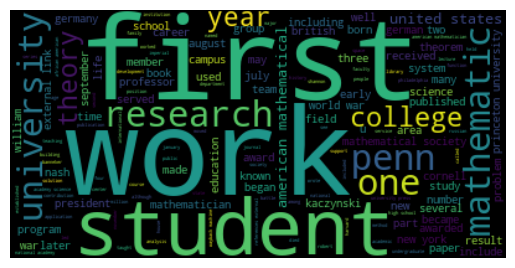

In [174]:
# WordCloud for category mathematician
wordcloud = WordCloud().generate(' '.join(tokens_mathematician))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

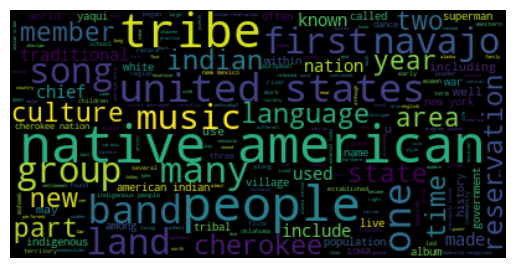

In [175]:
# WordCloud for category musician
wordcloud = WordCloud().generate(' '.join(tokens_musician))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- Sentences: Min/max/avg number of sentences per category together with the corresponding histograms and box plots


In [176]:
def segmentation(text):
    return nltk.sent_tokenize(text)

In [203]:
# data segmentation
data_frame_segmented['text'] = data_frame['text'].apply(segmentation)
data_frame_segmented.head()

text  \
0  [Alex Eskin (born May 19, 1965) is an American...   
1  [Alfred Leon Foster (1904-1994) was an America...   
2                                                 []   
3  [Alston Scott Householder (5 May 1904 – 4 July...   
4  [The American Mathematical Society (AMS) is an...   

                            name       category  
0                     Alex Eskin  mathematician  
1             Alfred Leon Foster  mathematician  
2                  Alonzo Church  mathematician  
3       Alston Scott Householder  mathematician  
4  American Mathematical Society  mathematician

In [204]:
# add column with counts of sentences per text
count_sentences = pd.Series(data=[len(text) for text in data_frame_segmented['text']], name="count_of_sentences")
data_frame_segmented = pd.concat([data_frame_segmented, count_sentences], axis=1)
data_frame_segmented

text  \
0    [Alex Eskin (born May 19, 1965) is an American...   
1    [Alfred Leon Foster (1904-1994) was an America...   
2                                                   []   
3    [Alston Scott Householder (5 May 1904 – 4 July...   
4    [The American Mathematical Society (AMS) is an...   
..                                                 ...   
331                                                 []   
332  [The Yaqui, Hiaki, or Yoeme, are a Native Amer...   
333  [Yaqui music is the music of the Yaqui tribe a...   
334  [The Yaqui, Hiaki, or Yoeme, are a Native Amer...   
335  [Yuman music is the music of Yumans, a group o...   

                              name       category  count_of_sentences  
0                       Alex Eskin  mathematician                  36  
1               Alfred Leon Foster  mathematician                  69  
2                    Alonzo Church  mathematician                   0  
3         Alston Scott Householder  mathematician                  20  
4    American Mathematical Society  mathematician                  43  
..                             ...            ...                 ...  
331                     XIT (band)       musician                   0  
332                          Yaqui       musician                 156  
333                    Yaqui music       musician                  17  
334                   Yaqui people       musician                 156  
335                    Yuman music       musician                  30  

[336 rows x 4 columns]

In [205]:
# drop records with empty text
data_frame_segmented = data_frame_segmented.loc[data_frame_segmented['count_of_sentences'] > 0]
data_frame_segmented

text  \
0    [Alex Eskin (born May 19, 1965) is an American...   
1    [Alfred Leon Foster (1904-1994) was an America...   
3    [Alston Scott Householder (5 May 1904 – 4 July...   
4    [The American Mathematical Society (AMS) is an...   
5    [Americans are the citizens and nationals of t...   
..                                                 ...   
330  [Willy DeVille (born William Paul Borsey Jr.; ...   
332  [The Yaqui, Hiaki, or Yoeme, are a Native Amer...   
333  [Yaqui music is the music of the Yaqui tribe a...   
334  [The Yaqui, Hiaki, or Yoeme, are a Native Amer...   
335  [Yuman music is the music of Yumans, a group o...   

                              name       category  count_of_sentences  
0                       Alex Eskin  mathematician                  36  
1               Alfred Leon Foster  mathematician                  69  
3         Alston Scott Householder  mathematician                  20  
4    American Mathematical Society  mathematician                  43  
5                        Americans  mathematician                 132  
..                             ...            ...                 ...  
330                  Willy DeVille       musician                 247  
332                          Yaqui       musician                 156  
333                    Yaqui music       musician                  17  
334                   Yaqui people       musician                 156  
335                    Yuman music       musician                  30  

[307 rows x 4 columns]

In [206]:
# Min/max/avg sentences in text for category mathematician
describe_mathematician = data_frame_segmented[data_frame_segmented["category"] == "mathematician"].describe()['count_of_sentences']
print(f"Max: {describe_mathematician['max']}")
print(f"Avg: {describe_mathematician['mean']}")
print(f"Min: {describe_mathematician['min']}")


Max: 1046.0
Avg: 69.42666666666666
Min: 4.0


Text(0.5, 0, 'Count of sentences for category Mathematician')

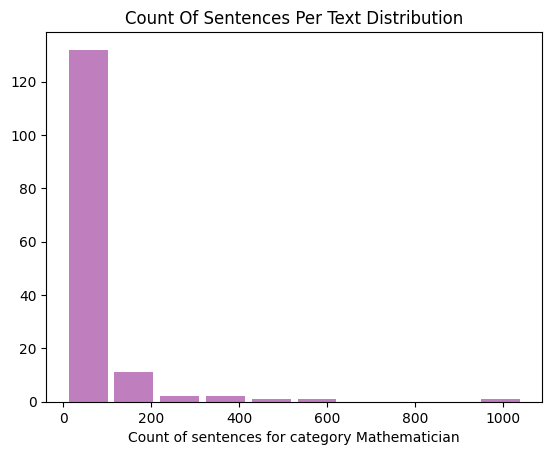

In [208]:
# Histogram of sentences per text in category Mathematician
plt.hist(data_frame_segmented[data_frame_segmented["category"] == "mathematician"]['count_of_sentences'],
             color='purple', alpha=0.5, rwidth=0.85)
plt.title('Count Of Sentences Per Text Distribution')
plt.xlabel('Count of sentences for category Mathematician')

Text(0.5, 0, 'Count of sentences for category Mathematician')

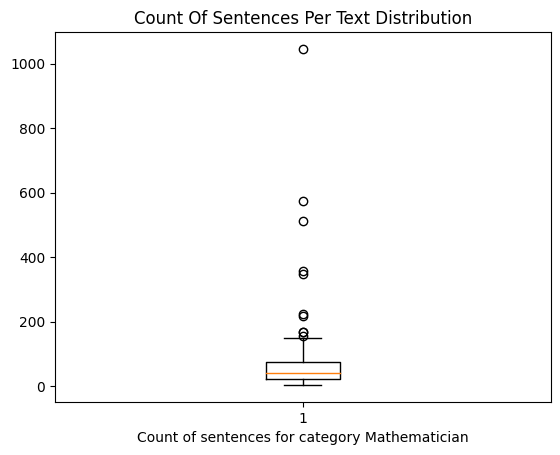

In [211]:
# Boxplot of sentences per text in category Mathematician
plt.boxplot(data_frame_segmented[data_frame_segmented["category"] == "mathematician"]['count_of_sentences'])
plt.title('Count Of Sentences Per Text Distribution')
plt.xlabel('Count of sentences for category Mathematician')

In [207]:
# Min/max/avg sentences in text for category musician
describe_musician = data_frame_segmented[data_frame_segmented["category"] == "musician"].describe()['count_of_sentences']
print(f"Max: {describe_musician['max']}")
print(f"Avg: {describe_musician['mean']}")
print(f"Min: {describe_musician['min']}")


Max: 821.0
Avg: 111.50955414012739
Min: 3.0


Text(0.5, 0, 'Count of sentences for category Musician')

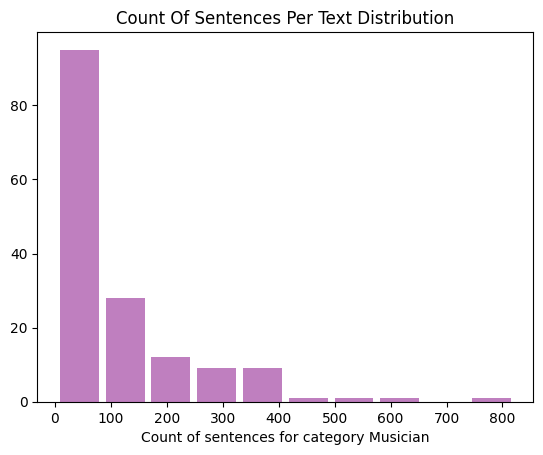

In [209]:
# Histogram of sentences per text in category Musician
plt.hist(data_frame_segmented[data_frame_segmented["category"] == "musician"]['count_of_sentences'],
             color='purple', alpha=0.5, rwidth=0.85)
plt.title('Count Of Sentences Per Text Distribution')
plt.xlabel('Count of sentences for category Musician')

Text(0.5, 0, 'Count of sentences for category Musician')

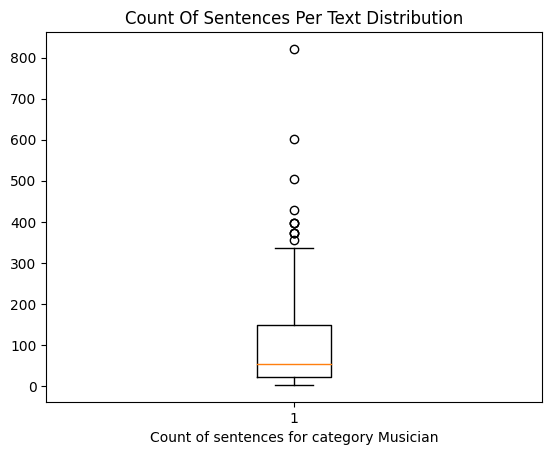

In [212]:
# Boxplot of sentences per text in category Musician
plt.boxplot(data_frame_segmented[data_frame_segmented["category"] == "musician"]['count_of_sentences'])
plt.title('Count Of Sentences Per Text Distribution')
plt.xlabel('Count of sentences for category Musician')

 - Tokens: Total number of token occurrences per category. Min/max/avg number of token occurrences per sentence per category.

In [ ]:
# total number of token occurrences per category


3. Classification